# 1. Import relevant libraries

In [91]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


# 2. Webscrapping using BeautifulSoup

In [2]:
data=requests.get('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai').text

In [3]:
soup=BeautifulSoup(data,'html.parser')

In [4]:
area=[]
loc=[]
lat=[]
lon=[]

In [5]:
for row in soup.find('table').find_all('tr'):
    cells=row.find_all('td')
    if (len(cells)>0):
        area.append(cells[0].text)
        loc.append(cells[1].text)
        lat.append(cells[2].text)
        lon.append(cells[3].text)

Let us take a look at the various data from the table stored in the four lists.

In [6]:
area_mumbai=[]
for areas in area:
    area_mumbai.append(areas.replace('\n',''))

In [7]:
area_mumbai[0:5]

['Amboli', 'Chakala\tAndheri,', 'D.N. Nagar', 'Four Bungalows', 'Lokhandwala']

In [8]:
loc_mumbai=[]
for locations in loc:
    loc_mumbai.append(locations.replace('\n',''))

In [9]:
loc_mumbai[0:5]

['Andheri,Western Suburbs',
 'Western Suburbs',
 'Andheri,Western Suburbs',
 'Andheri,Western Suburbs',
 'Andheri,Western Suburbs']

In [10]:
lat_mumbai=[]
for lats in lat:
    lat_mumbai.append(lats.replace('\n',''))
lon_mumbai=[]
for lons in lon:
    lon_mumbai.append(lons.replace('\n',''))

In [11]:
lat_mumbai[0:5]

['19.1293', '19.111388', '19.124085', '19.124714', '19.130815']

In [12]:
lon_mumbai[0:5]

['72.8434', '72.860833', '72.831373', '72.82721', '72.82927']

Let us transform all the webscrapped data into a more readable dataframe as shown below:

In [13]:
df_mumbai=pd.DataFrame(columns=['Area','Location','Latitude','Longitude'])
df_mumbai['Area']=area_mumbai
df_mumbai['Location']=loc_mumbai
df_mumbai['Latitude']=lat_mumbai
df_mumbai['Longitude']=lon_mumbai
df_mumbai

,Area,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.1293,72.8434
1,"Chakala\tAndheri,",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.82721
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.82927
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.12,72.82
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


We see that row number 82 has an incorrect longitude. We google it and correct the longitude value.

In [14]:
df_mumbai['Longitude'][82]=72.8479
df_mumbai

,Area,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.1293,72.8434
1,"Chakala\tAndheri,",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.82721
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.82927
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.12,72.82
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


In [15]:
df_mumbai.to_csv('Mumbai neighborhood coordinates.csv')

# 3. Using Folium to visualise the areas on map of Mumbai

In [16]:
latitude=19.07 
longitude=72.87

map_mumbai = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat,lon,areas,location in zip(df_mumbai['Latitude'],df_mumbai['Longitude'],df_mumbai['Area'],df_mumbai['Location']):
                                        
                                        label='{} {}'.format(areas,location)
                                        label=folium.Popup(label)
                                        
                                        folium.CircleMarker(
                                            [lat,lon], radius=5,popup=label,color='orange',fill=True,fill_color='black',fill_opacity=0.6).add_to(map_mumbai)
                                   

In [17]:
map_mumbai

# 4. Using Foursquare API to search for top 20 places within a radius of 500m

In [18]:
CLIENT_ID='ZALY0GYPRA1XXX0BZZQNLFG1C3FBIFA4E23TL4XPUSQ42G1P'
CLIENT_SECRET='XA524DRFQCWEIRUGCIHPVUOADC32EPK3OPCHFRSUERFXCPWH'
VERSION = '20180605'

In [19]:
venues = []

radius = 500
LIMIT = 20


for lat, lon, loc,areas in zip(df_mumbai['Latitude'], df_mumbai['Longitude'], df_mumbai['Location'], df_mumbai['Area']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lon,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            areas, 
            loc,
            lat, 
            lon, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [20]:
venues_df=pd.DataFrame(venues)
venues_df.rename(columns={0:'Area',1:'Location',2:'Area latitude',3:'Area longitude',4:'Venue name',5:'Venue latitude',6:'Venue longitude',7:'Venue category'},inplace=True)
venues_df

,Area,Location,Area latitude,Area longitude,Venue name,Venue latitude,Venue longitude,Venue category
0,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Cafe Arfa,19.128930,72.847140,Indian Restaurant
1,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
2,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Subway,19.127860,72.844461,Sandwich Place
3,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Cafe Coffee Day,19.127748,72.844663,Coffee Shop
4,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,V33,19.129068,72.843670,Gym
5,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Delhi Zaika,19.132159,72.844406,Halal Restaurant
6,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Bhardawadi Ground,19.126143,72.843548,Park
7,Amboli,"Andheri,Western Suburbs",19.1293,72.8434,Nukkad Food Bistro,19.126058,72.846618,Fast Food Restaurant
8,"Chakala\tAndheri,",Western Suburbs,19.111388,72.860833,Courtyard Mumbai International Airport,19.114167,72.864131,Hotel
9,"Chakala\tAndheri,",Western Suburbs,19.111388,72.860833,Faaso's,19.113938,72.862330,Fast Food Restaurant


Let us check the number of unique venue categories.

In [21]:
venues_df['Venue category'].unique()

array(['Indian Restaurant', 'Chinese Restaurant', 'Sandwich Place',
       'Coffee Shop', 'Gym', 'Halal Restaurant', 'Park',
       'Fast Food Restaurant', 'Hotel', 'Cocktail Bar', 'Café',
       'Falafel Restaurant', 'Pizza Place', 'Asian Restaurant',
       'Restaurant', 'Multiplex', 'Seafood Restaurant',
       'Salon / Barbershop', 'Gym / Fitness Center', 'Snack Place',
       'Juice Bar', 'Residential Building (Apartment / Condo)',
       'Vegetarian / Vegan Restaurant', "Women's Store", 'Fish Market',
       'Bar', 'Market', 'Sports Club', 'Convenience Store', 'Pharmacy',
       'Ice Cream Shop', 'Liquor Store', 'Pub', 'Lounge', 'Concert Hall',
       'Department Store', 'Train Station', 'Diner', 'Flea Market',
       'Bakery', 'Food', 'South Indian Restaurant', 'Recreation Center',
       'Bistro', 'Dessert Shop', 'Shipping Store', 'Bus Station',
       'Resort', 'Beach', 'Playground', 'Scenic Lookout', 'Boutique',
       'Italian Restaurant', 'Hotel Bar', 'Performing Arts Venue

# 5. Data analysis

In [22]:
len(venues_df['Venue category'].unique())

156

In [23]:
categories_onehot=pd.get_dummies(venues_df['Venue category'])

In [24]:
mumbai_category_df=pd.DataFrame(venues_df['Area'],columns=['Area'])

In [25]:
mumbai_category_df=mumbai_category_df.merge(categories_onehot,on=mumbai_category_df.index)

In [26]:
mumbai_category_df.head()

,key_0,Area,ATM,Advertising Agency,Afghan Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Bus Station,Café,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Auditorium,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,History Museum,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Moving Target,Multiplex,Music Store,Music Venue,Neighborhood,Nightclub,North Indian Restaurant,Other Great Outdoors,Outlet Mall,Paper / Office Supplies Store,Park,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Tea Room,Tennis Court,Theater,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Amboli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
mumbai_category_grouped=mumbai_category_df.groupby(['Area']).mean().reset_index()

In [28]:
mumbai_category_grouped.drop('key_0',axis=1,inplace=True)

In [29]:
mumbai_category_grouped.head()

,Area,ATM,Advertising Agency,Afghan Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Bus Station,Café,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Auditorium,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,History Museum,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Moving Target,Multiplex,Music Store,Music Venue,Neighborhood,Nightclub,North Indian Restaurant,Other Great Outdoors,Outlet Mall,Paper / Office Supplies Store,Park,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Tea Room,Tennis Court,Theater,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Agripada,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Altamount Road,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.222222,0.0,0.0,0.000,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Amboli,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.125,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,

# 6. Segregate the venue categories of interest

Since we are primarily interested to set up a bar, we can segregate the above dataframe into venue categories such as bars, pubs, sports bars,cocktail bar,beer bar, beer garden.

In [41]:
bar_list=['Sports Bar','Gastropub','Bar','Beer Bar','Beer Garden','Club House']

In [70]:
bar_category_df=pd.DataFrame(columns=[mumbai_category_grouped.columns])
bar_category_df=mumbai_category_grouped[mumbai_category_grouped['Pub']>0]

In [72]:
for i in range(0,len(bar_list)):
    bar_category_df=bar_category_df.append(mumbai_category_grouped[mumbai_category_grouped['{}'.format(bar_list[i])]>0])

In [73]:
bar_category_df.reset_index(drop=True,inplace=True)

In [74]:
bar_category_df

,Area,ATM,Advertising Agency,Afghan Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Bus Station,Café,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Auditorium,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Goan Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,History Museum,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Moving Target,Multiplex,Music Store,Music Venue,Neighborhood,Nightclub,North Indian Restaurant,Other Great Outdoors,Outlet Mall,Paper / Office Supplies Store,Park,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Tea Room,Tennis Court,Theater,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Khar Danda,0.00,0.000000,0.0,0.00,0.0,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.000000,0.150000,0.00,0.00,0.05,0.05,0.05,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.000000,0.050000,0.0,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.00,0.000000,0.050000,0.000000,0.00,0.00,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.050000,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.05,0.000000,0.0,0.000000,0.200000,0.00,0.000000,0.000000,0.00,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.100000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.00,0.0,0.0000,0.0000,0.000000,0.0,0.05,0.00,0.00,0.0,0.000000,0.00,0.00,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.100000,0.000000,0.000000,0.0,0.050000,0.0,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.00,0.00,0.0,0.00,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.0
1,Lokhandwala,0.00,0.000000,0.0,0.00,0.0,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.00,0.058824,0.117647,0.00,0.058824,0.000000,0.000000,0.00,0.00,0.0,0.00,0.058824,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,0.058824,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.058824,0.00,0.000000,0.000000,0.00,0.0000,0.000000,0.0,0.000000,0.0,0.058824,0.058824,0.0,0.058824,0.000000,0.00,0.00,0.00,0.0,0.00,0.0,0.0000,0.0000,0.000000,0.0,0.00,0.00,0.00,0.0,0.000000,0.00,0.00,0.058824,0.058824,0.0,0.0,0.00,0.000000,0.117647,0.000000,0.058824,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.0,0.0

# 5. Using KMeans clustering

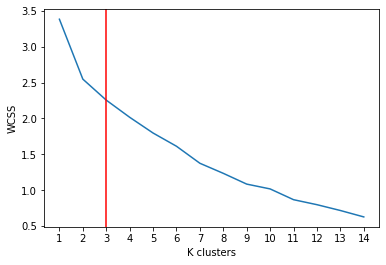

In [109]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,max_iter=300)
    kmeans.fit(bar_category_df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.ylabel('WCSS')
plt.xlabel('K clusters')
plt.xticks(np.arange(1,15))
plt.axvline(3,color='red')


From the above elbow figure, it can't be completely determined as to what should be the optimum clusters. At k=3, the slope of WCSS reduces. Moreover, k=3 gives decent results in our analysis. Hence, we choose k=3 for further study.

In [102]:
k=3
kmeans=KMeans(n_clusters=k)
kmeans.fit(bar_category_df.iloc[:,1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [103]:
labels=kmeans.labels_
cluster_df=pd.DataFrame(columns=['Area','Label'])
cluster_df['Area']=bar_category_df.iloc[:,0]


In [104]:
cluster_df['Label']=labels
cluster_df.head()

,Area,Label
0,Khar Danda,0
1,Lokhandwala,1
2,Lower Parel,1
3,Pali Naka,1
4,Seven Bungalows,1


In [105]:
cluster_df=cluster_df.merge(df_mumbai,on='Area')

In [106]:
cluster_df

,Area,Label,Location,Latitude,Longitude
0,Khar Danda,0,"khar,western Suburbs",19.068598,72.840042
1,Khar Danda,0,"khar,western Suburbs",19.068598,72.840042
2,Khar Danda,0,"khar,western Suburbs",19.068598,72.840042
3,Khar Danda,0,"khar,western Suburbs",19.068598,72.840042
4,Khar Danda,0,"khar,western Suburbs",19.068598,72.840042
5,Lokhandwala,1,"Andheri,Western Suburbs",19.130815,72.82927
6,Lower Parel,1,South Mumbai,18.995278,72.83
7,Pali Naka,1,"khar,western Suburbs",19.062742,72.829396
8,Seven Bungalows,1,"Andheri,Western Suburbs",19.129052,72.817018
9,Bhandup,1,Eastern Suburbs,19.14,72.93


# 6. Projecting the various clusters on a folium map

In [107]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i+x+(i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0,1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, area,loc,cluster in zip(cluster_df['Latitude'], cluster_df['Longitude'], cluster_df['Area'], cluster_df['Location'],cluster_df['Label']):
    label = folium.Popup('{} ({}) - Cluster {}'.format(loc,area,cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

let us explore the various clustered areas as follows

Intitially, we used K=5 labels. In this case, two labels had only one entry each. This means we need to lower the K labels.

## Cluster 1

In [81]:
cluster_df[cluster_df['Label']==0]

,Area,Label,Location,Latitude,Longitude
5,Lokhandwala,0,"Andheri,Western Suburbs",19.130815,72.82927
6,Lower Parel,0,South Mumbai,18.995278,72.83
9,Bhandup,0,Eastern Suburbs,19.14,72.93
10,Mankhurd,0,Harbour Suburbs,19.05,72.93
11,Chembur,0,Harbour Suburbs,19.051,72.894
12,Chembur,0,Harbour Suburbs,19.051,72.894
13,Deonar,0,"Govandi,Harbour Suburbs",19.05,72.89
14,Deonar,0,"Govandi,Harbour Suburbs",19.05,72.89
15,Breach Candy,0,South Mumbai,18.967,72.805
17,Churchgate,0,South Mumbai,18.93,72.82


## Cluster 2

In [82]:
cluster_df[cluster_df['Label']==1]

,Area,Label,Location,Latitude,Longitude
34,Versova,1,"Andheri,Western Suburbs",19.12,72.82


## Cluster 3

In [83]:
cluster_df[cluster_df['Label']==2]

,Area,Label,Location,Latitude,Longitude
0,Khar Danda,2,"khar,western Suburbs",19.068598,72.840042
1,Khar Danda,2,"khar,western Suburbs",19.068598,72.840042
2,Khar Danda,2,"khar,western Suburbs",19.068598,72.840042
3,Khar Danda,2,"khar,western Suburbs",19.068598,72.840042
4,Khar Danda,2,"khar,western Suburbs",19.068598,72.840042
7,Pali Naka,2,"khar,western Suburbs",19.062742,72.829396
8,Seven Bungalows,2,"Andheri,Western Suburbs",19.129052,72.817018
16,Cavel,2,South Mumbai,18.9474,72.8272
19,Dahisa,2,Western Suburbs,19.250069,72.859347
20,Dava Bazaar,2,South Mumbai,18.946882,72.831362


In [84]:
sizes=[]

for labels in np.arange(0,3):
    sizes.append(cluster_df[cluster_df['Label']==labels].shape[0])

In [85]:
sizes_df=pd.DataFrame(columns=['Label name','Label size'])

In [86]:
sizes_df['Label name']=np.arange(1,4)
sizes_df['Label size']=sizes

In [87]:
sizes_df.index=sizes_df['Label name']

In [88]:
sizes_df.drop('Label name', axis=1,inplace=True)
sizes_df

,Label size
Label name,
1,18
2,1
3,19
